# Partie chatbot ( movies_details : according to our dataset)

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("movies_metadata.csv")



C:\Users\Hamdikirito\AppData\Local\Temp\ipykernel_5092\3606005379.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("movies_metadata.csv")


C:\Users\Hamdikirito\AppData\Local\Temp\ipykernel_5092\3786407828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_vote_count.loc[:, 'vote_count'] = title_vote_count['vote_count'].fillna(0).astype(int)
C:\Users\Hamdikirito\AppData\Local\Temp\ipykernel_5092\3786407828.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  title_vote_count.loc[:, 'vote_count'] = title_vote_count['vote_count'].fillna(0).astype(int)
C:\Users\Hamdikirito\AppData\Local\Temp\ipykernel_5092\3786407828.py:5: SettingWithCopyWarning: 
A value is

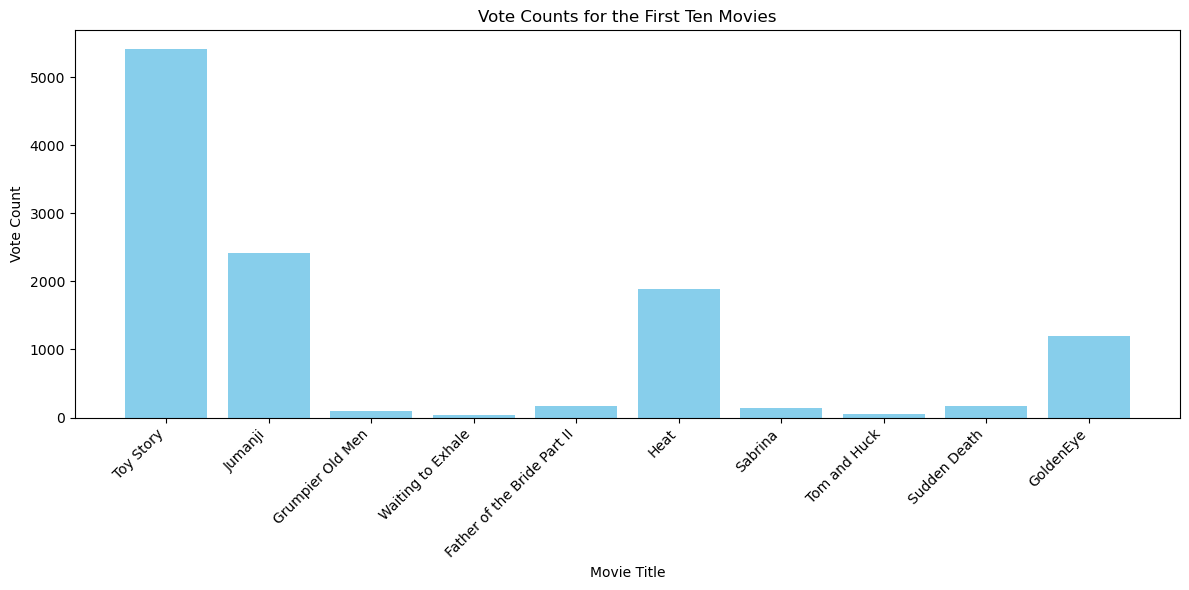

In [8]:

title_vote_count = df[['title', 'vote_count']]

title_vote_count.loc[:, 'vote_count'] = title_vote_count['vote_count'].fillna(0).astype(int)

title_vote_count.loc[:, 'title'] = title_vote_count['title'].astype(str)

title_vote_count_first_ten = title_vote_count.head(10)

def plot_vote_counts():
    plt.figure(figsize=(12, 6))
    plt.bar(title_vote_count_first_ten['title'], title_vote_count_first_ten['vote_count'], color='skyblue')
    plt.xlabel('Movie Title')
    plt.ylabel('Vote Count')
    plt.title('Vote Counts for the First Ten Movies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
plot_vote_counts()


C:\Users\Hamdikirito\AppData\Local\Temp\ipykernel_5092\4169653370.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title_vote_count.loc[:, 'vote_count'] = title_vote_count['vote_count'].fillna(0).astype(int)
C:\Users\Hamdikirito\AppData\Local\Temp\ipykernel_5092\4169653370.py:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  title_vote_count.loc[:, 'vote_count'] = title_vote_count['vote_count'].fillna(0).astype(int)


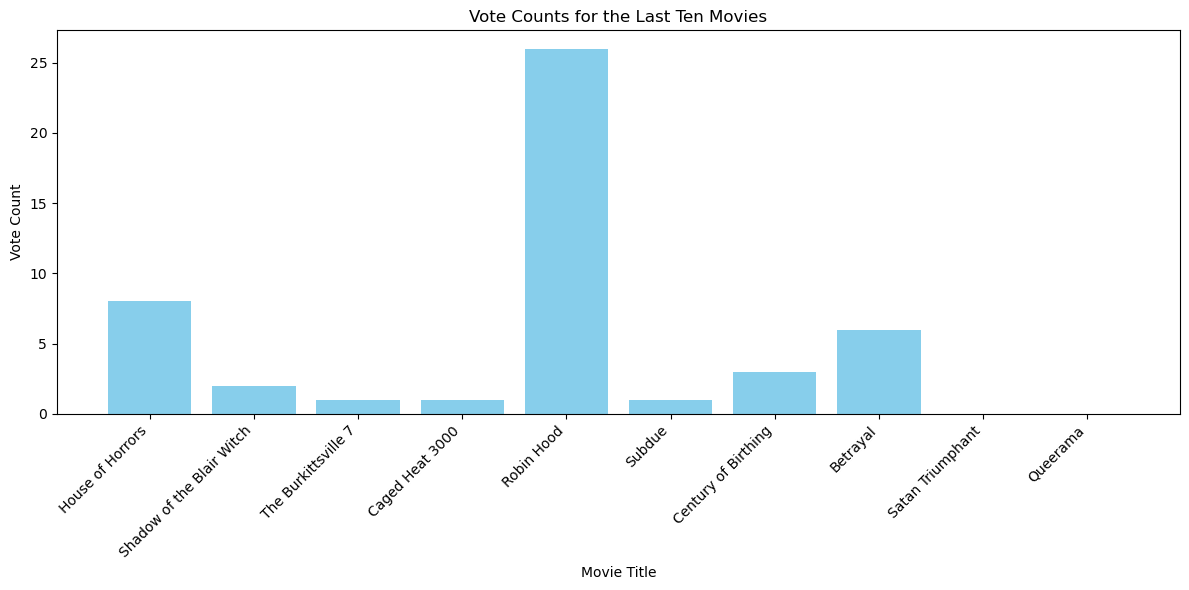

In [9]:
def value_counts_tail(title_vote_count_last_ten):

    plt.figure(figsize=(12, 6))
    plt.bar(title_vote_count_last_ten['title'], title_vote_count_last_ten['vote_count'], color='skyblue')
    plt.xlabel('Movie Title')
    plt.ylabel('Vote Count')
    plt.title('Vote Counts for the Last Ten Movies')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


title_vote_count = df[['title', 'vote_count']]

title_vote_count.loc[:, 'vote_count'] = title_vote_count['vote_count'].fillna(0).astype(int)

title_vote_count_last_ten = title_vote_count.tail(10)

value_counts_tail(title_vote_count_last_ten)


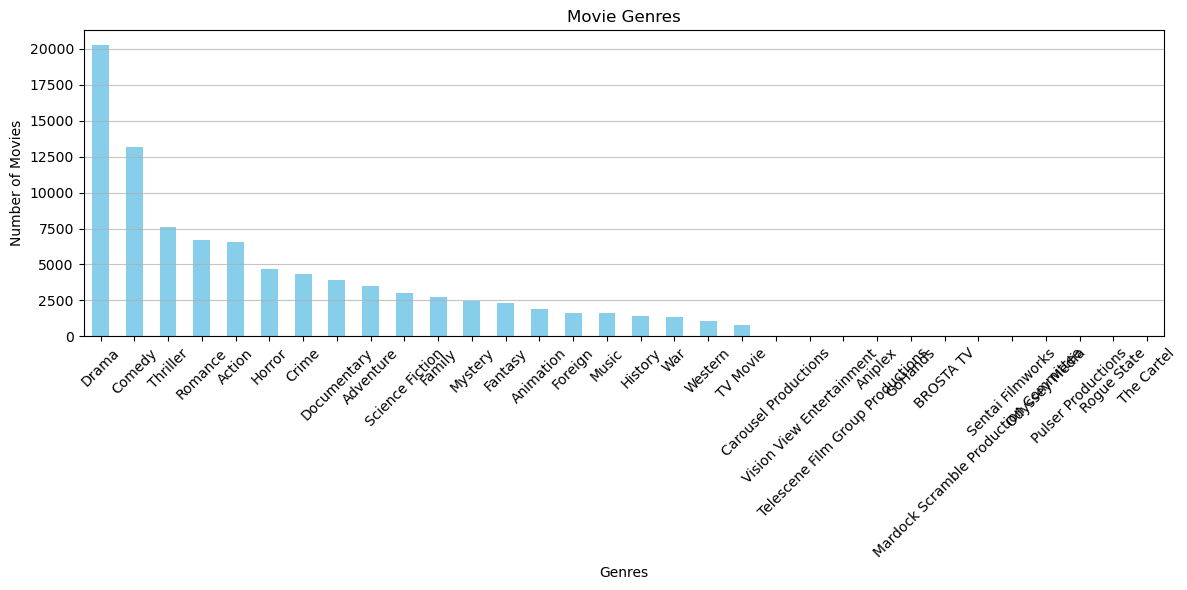

In [10]:
def plot_movie_genres():
    genres = df['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])
    genres_counts = genres.explode().value_counts().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    genres_counts.plot(kind='bar', color='skyblue')
    plt.title('Movie Genres')
    plt.xlabel('Genres')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()
plot_movie_genres()

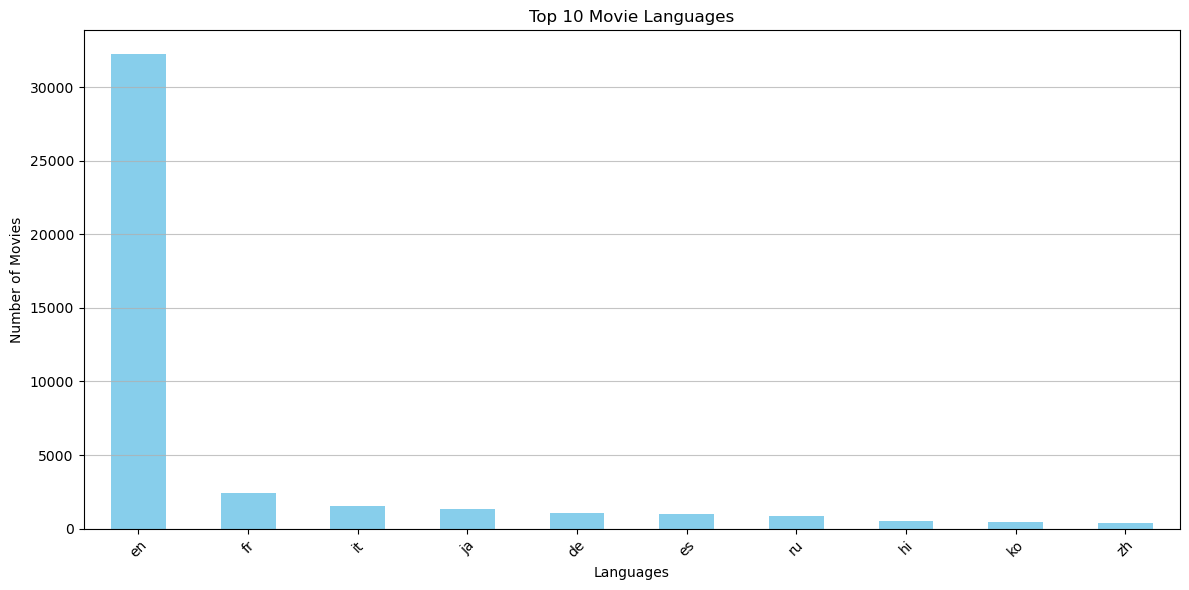

In [11]:
def plot_top_languages():

    language_counts = df['original_language'].value_counts()

    # Plot the top 10 languages
    plt.figure(figsize=(12, 6))
    language_counts.head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Movie Languages')
    plt.xlabel('Languages')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()
plot_top_languages()

In [15]:
def get_movie_info(movie_name):
    movie_info = df[df['title'].str.lower() == movie_name.lower()]
    if len(movie_info) == 0:
        return "Movie not found. Please try again."
    else:
        return movie_info.iloc[0]

def plot_movie_info(movie_info):
    print("Chatbot: Movie found. What category would you like to know about? Choose from:")
    print(", ".join(movie_info.keys()))
    category = input("You: ")
    if category in movie_info:
        print(f"Chatbot: {category.capitalize()}: {movie_info[category]}")
    else:
        print("Chatbot: Category not found. Please try again.")


    while True:
        more_info = input("Chatbot: Do you need further assistance with your movie search? (yes/no): ")
        if more_info.lower() == 'yes':
            print("Chatbot: Sure! Here are some plots that can help you make your decision:")
            plot_vote_counts()
            value_counts_tail(title_vote_count_last_ten)
            plot_top_languages()
            plot_movie_genres()
            plot_top_movies(df)
            break
        elif more_info.lower() == 'no':
            print("Chatbot: Okay, goodbye!")
            break
        else:
            print("Chatbot: Invalid input. Please enter 'yes' or 'no'.")


print("Chatbot: Hi! I'm a movie information bot. You can ask me about movie details.")
print("Chatbot: Type 'exit' to end the conversation.")

while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        print("Chatbot: Goodbye!")
        break
    movie_name = user_input.strip()
    movie_info = get_movie_info(movie_name)
    if isinstance(movie_info, str):
        print(f"Chatbot: {movie_info}")
    else:
        plot_movie_info(movie_info)


Chatbot: Hi! I'm a movie information bot. You can ask me about movie details.
Chatbot: Type 'exit' to end the conversation.
You: the dark knight
Chatbot: Movie found. What category would you like to know about? Choose from:
adult, belongs_to_collection, budget, genres, homepage, id, imdb_id, original_language, original_title, overview, popularity, poster_path, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, video, vote_average, vote_count
You: overview
Chatbot: Overview: Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker.
Chatbot: Do you need further assistance with your movie s

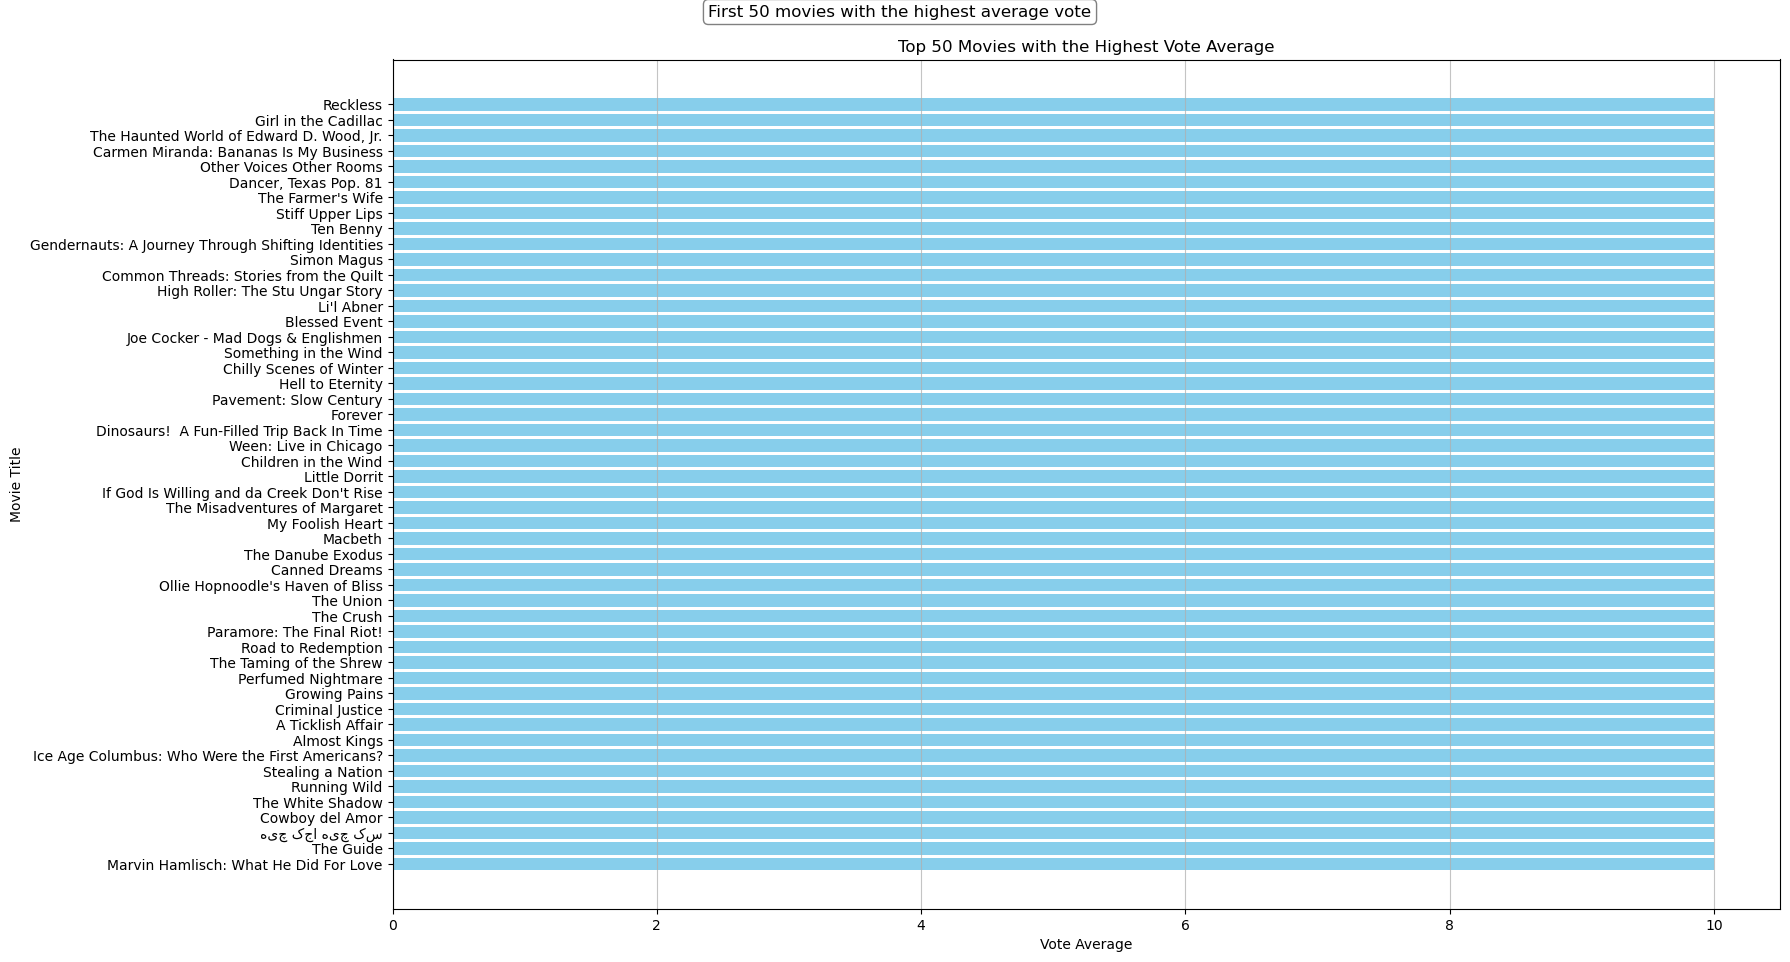

In [13]:
def plot_top_movies(df):
    top_50_movies = df.nlargest(50, 'vote_average')

    plt.figure(figsize=(18, 10))
    plt.barh(top_50_movies['title'], top_50_movies['vote_average'], color='skyblue')
    plt.xlabel('Vote Average')
    plt.ylabel('Movie Title')
    plt.title('Top 50 Movies with the Highest Vote Average')
    plt.gca().invert_yaxis() 
    plt.grid(axis='x', alpha=0.75)
    
  
    plt.annotate('First 50 movies with the highest average vote', 
                 xy=(0.5, 0.95), 
                 xycoords='figure fraction', 
                 ha='center', va='center', 
                 fontsize=12, 
                 bbox=dict(boxstyle='round', fc='white', ec='gray', lw=1))

    plt.tight_layout()
    plt.show()

plot_top_movies(df)

# Partie Traduction


# le premier traducteur : une capaité de traduction qui ne dépasse pas une phrase. 

In [1]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch

In [2]:
model_name = "t5-base"
model = T5ForConditionalGeneration.from_pretrained(model_name)

In [3]:
tokenizer = T5Tokenizer.from_pretrained(model_name)

def translate_english_to_french(english_sentence):
   
    input_text = "translate English to French: " + english_sentence

    input_ids = tokenizer.encode(input_text, return_tensors="pt")

    with torch.no_grad():
        outputs = model.generate(input_ids=input_ids)

    french_translation = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return french_translation


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [18]:
english_sentence = input("user :")
french_translation = translate_english_to_french(english_sentence)

print("English:", english_sentence)
print("French:", french_translation)

user :Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker.
English: Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker.
French: Batman a l'intention de mettre en uvre une stratégie de


In [21]:
!pip install googletrans==4.0.0-rc1



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/55.1 kB ? eta -:--:--
     -------------------------------------    51.2/55.1 kB 2.7 MB/s eta 0:00:01
     -------------------------------------- 55.1/55.1 kB 723.6 kB/s eta 0:00:00
                                              0.0/1.1 MB ? eta -:--:--
     --                                       0.1/1.1 MB 812.7 kB/s eta 0:00:02
     ---                                      0.1/1.1 MB 1.1 MB/s eta 0:00:01
     ------                                   0.2/1.1 MB 1.1 MB/s eta 0:00:01
     ------                                   0.2/1.1 MB 1.2 MB/s eta 0:00:01
     ------                                   0.2/1.1 MB 1.2 MB/s eta 0:00:01
     ------                                   0.2/1.1 MB 1.2 MB/s eta 0:00:01
     ------                                   0.2/1.1 MB 1.2 MB/s eta 0:00:01
     ------                                   0

# le deuxiéme traducteur : capacité de traduction très puissante.

In [1]:

from googletrans import Translator

translator = Translator()

print("Welcome to the English to French translator. Type 'exit' to quit.")

while True:
    
    user_input = input("Enter a message: ")

    if user_input.lower() == 'exit':
        print("Goodbye!")
        break

    translated_text = translator.translate(user_input, dest='fr').text

    print("Translated to French:", translated_text)



Welcome to the English to French translator. Type 'exit' to quit.
Enter a message: Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker.
Translated to French: Batman augmente les enjeux de sa guerre contre le crime.Avec l'aide du lieutenant Jim Gordon et du procureur de district Harvey Dent, Batman entretient pour démanteler les organisations criminelles restantes qui affligent les rues.Le partenariat s'avère efficace, mais ils se retrouvent bientôt pratiques à un règne de chaos déchaîné par un cerveau criminel croissant connu des citoyens terrifiés de Gotham comme Joker.
Enter a message: exit
Goodbye!


# partie analyse de sentiments ( positive/negative)

In [2]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
# Load the dataset
data = pd.read_csv("IMDB Dataset.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


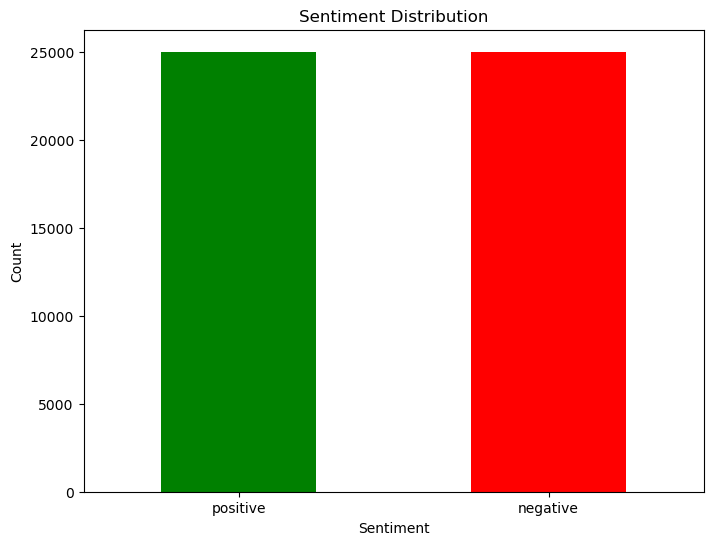

In [23]:
import matplotlib.pyplot as plt
data.info()
plt.figure(figsize=(8, 6))
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Preprocess the text data
stopwords = nltk.corpus.stopwords.words("english")
stemmer = nltk.stem.PorterStemmer()

def preprocess(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and stem the tokens
    tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stopwords]

    # Join the tokens back into a string
    return " ".join(tokens)

data["review"] = data["review"].apply(preprocess)

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["review"], data["sentiment"], test_size=0.2, random_state=42)

In [5]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [6]:
# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
# Train the model using CountVectorizer
model_count = LogisticRegression()
model_count.fit(X_train_count, y_train)


C:\Users\Hamdikirito\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# Train the model using TfidfVectorizer
model_tfidf = LogisticRegression()
model_tfidf.fit(X_train_tfidf, y_train)

C:\Users\Hamdikirito\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Evaluate the performance of the model using CountVectorizer
y_pred_count = model_count.predict(X_test_count)
print("Accuracy (CountVectorizer):", accuracy_score(y_test, y_pred_count))
print("Precision (CountVectorizer):", precision_score(y_test, y_pred_count, pos_label="positive"))
print("Recall (CountVectorizer):", recall_score(y_test, y_pred_count, pos_label="positive"))
print("F1 Score (CountVectorizer):", f1_score(y_test, y_pred_count, pos_label="positive"))

Accuracy (CountVectorizer): 0.88
Precision (CountVectorizer): 0.8742444921037239
Recall (CountVectorizer): 0.8898590990275849
F1 Score (CountVectorizer): 0.88198269079465


In [9]:
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
print("Accuracy (TfidfVectorizer):", accuracy_score(y_test, y_pred_tfidf))
print("Precision (TfidfVectorizer):", precision_score(y_test, y_pred_tfidf, pos_label="positive"))
print("Recall (TfidfVectorizer):", recall_score(y_test, y_pred_tfidf, pos_label="positive"))
print("F1 Score (TfidfVectorizer):", f1_score(y_test, y_pred_tfidf, pos_label="positive"))

Accuracy (TfidfVectorizer): 0.8904
Precision (TfidfVectorizer): 0.8789160099942341
Recall (TfidfVectorizer): 0.9075213335979361
F1 Score (TfidfVectorizer): 0.8929896504588949


In [24]:
new_text = input("user :")

# Preprocess the new text
new_text_preprocessed = preprocess(new_text)

# Vectorize the preprocessed new text using TfidfVectorizer
new_text_tfidf = vectorizer.transform([new_text_preprocessed])

# Make a prediction using the trained model with TfidfVectorizer
prediction = model_tfidf.predict(new_text_tfidf)

# Print the prediction
print("The predicted sentiment for the new text is:", prediction)

user :the acting was so bad 
The predicted sentiment for the new text is: ['negative']
